# Moving To Richmond

In [11]:
##!conda install -c anaconda beautifulsoup4 -y
##!conda install -c anaconda lxml -y
##!conda install -c anaconda requests -y
##!conda config --add channels conda-forge
##!conda install -c conda-forge geopy --yes
##!conda install -c conda-forge folium=0.5.0 --yes
##  imports and functions
from project_lib import Project
from bs4 import BeautifulSoup
import requests
import lxml
import csv
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
from geopy import distance
# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML     
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
import folium # plotting library
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
# import k-means from clustering stage
from sklearn.cluster import KMeans

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]
RVA_Cities =['richmond, va','chesterfield, va', 'midlothian, va', 'henrico, va', 'glen allen, va', 'ashland, va','chamberlayne, va', 'mechanicsville, va']


In [2]:
# The code was removed by Watson Studio for sharing.

In [3]:
zipfile = pd.read_csv("https://move-econresearch-prod.s3-us-west-2.amazonaws.com/listings/core/current_month/RDC_Inventory_Core_Metrics_Zip_Current.csv")

In [12]:
zip2 = zipfile[['postal_code','zip_name', 'median_listing_price','average_listing_price','new_listing_count','active_listing_count','total_listing_count','price_reduced_count','median_days_on_market']]
##zip2.head()
rva_df = zip2.loc[zip2['zip_name'].isin(RVA_Cities)]
rva_df.rename(columns={'postal_code': 'ZipCode'},inplace=True)
rva_df.shape

(27, 9)

In [13]:
##Use geopy library to get the latitude and longitude values of new jobs address
geolocator = Nominatim(user_agent="my-application")
location = geolocator.geocode(new_job_addr)
nja_latitude = location.latitude
nja_longitude = location.longitude
print('The geograpical coordinates of Job location are {}, {}.'.format( nja_latitude, nja_longitude))
print(location.raw['display_name'])

The geograpical coordinates of Job location are 37.60536995, -77.5272805050902.
7100, Forest Avenue, Laurel, Crestview, Henrico County, Virginia, 23226, United States of America


In [14]:
coords = []
 
geolocator = Nominatim(user_agent="my-application")
for zipcode, city in zip(rva_df['ZipCode'],rva_df['zip_name'] ):
    location = geolocator.geocode({"postalcode": zipcode, "state": 'VA'})
    latitude2 = location.latitude
    longitude2 = location.longitude
    ##print(location)
    miles = distance.distance((nja_latitude,nja_longitude),(latitude2,longitude2)).mi
    #print(round(miles))
    coords.append((
        zipcode,
        latitude2,
        longitude2,
        miles,
        location.raw['display_name']))

In [15]:
# dconvert the list into a new DataFrame
coords_df = pd.DataFrame(coords)
#define the column names
coords_df.columns = ['ZipCode','Latitude', 'Longitude', 'Distance','display_name']

##print(coords_df.shape)
##coords_df

In [16]:
mylist = coords_df['display_name'].to_list()
cleaner = []
for row in mylist:
    x = row.split(',')
    cleaner.append((x.pop(0)))
coords_df['display_name'] = pd.Series(cleaner)
coords_df

,ZipCode,Latitude,Longitude,Distance,display_name
0,23060,37.657968,-77.529652,3.629803,Henrico County
1,23223,37.550750,-77.388059,8.519557,East Highland Park
2,23005,37.745020,-77.474184,10.061280,Ashland
3,23221,37.563804,-77.489576,3.535487,Richmond City
4,23225,37.518329,-77.504432,6.132441,Richmond City
5,23220,37.555701,-77.452632,5.340452,Richmond City
6,23229,37.595856,-77.565052,2.173955,Tuckahoe
7,23233,37.638190,-77.618639,5.499002,Henrico County
8,23112,37.423764,-77.649894,14.220709,Chesterfield County
9,23224,37.491457,-77.478117,8.306879,Richmond City


In [17]:
# create map
map_zip = folium.Map(location=[nja_latitude, nja_longitude], zoom_start=12)

label = '7100 Forest Ave 23226'
label = folium.Popup(label, parse_html=True)
folium.CircleMarker(
    [nja_latitude, nja_longitude],
    radius=5,
    popup=label,
    color='red',
    fill=True,
    fill_color='#FDBB84',
    fill_opacity=0.7).add_to(map_zip)  

 
for lat, lng, zipcode, dispname in zip(coords_df['Latitude'], coords_df['Longitude'],coords_df['ZipCode'], coords_df['display_name']):
    label = '{}, {}'.format(dispname, zipcode)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_zip)        
map_zip

In [21]:
# The code was removed by Watson Studio for sharing.

In [22]:
##get the area info for goods and services
## Foursquare API required inputs
VERSION = '20180604'
LIMIT = 100
radius = 5000
venue_list = []

##loop thru and get info from 4square
for lat, lng, zipcode, dispname in zip(coords_df['Latitude'], coords_df['Longitude'],coords_df['ZipCode'], coords_df['display_name']):
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        lat,
        lng,
        radius, 
        LIMIT)
    
    results = requests.get(url).json()

    items = results['response']['groups'][0]['items']
    ##print(items)
    ##break
    for venue in items:
        try:
            venue_list.append(( 
                zipcode,
                dispname, 
                venue['venue']['name'], 
                venue['venue']['location']['address'],
                venue['venue']['categories'][0]['name']))
        except:
            continue

In [23]:
# dconvert the venue list into a new DataFrame
venues_df = pd.DataFrame(venue_list)
#define the column names
venues_df.columns = ['ZipCode','Display_Name', 'VenueName', 'VenueAddress', 'Category']

print(venues_df.shape)


(2394, 5)


In [51]:
print('There are {} uniques categories.'.format(len(venues_df['Category'].unique())))

There are 222 uniques categories.


In [36]:
rva_gs = ['Grocery Store', 'Supermarket','Drugstore', 'Pharmacy', 'Market','Pet Store', 'Coffee Shop', 'Wine Shop','Gym / Fitness Center','Salon / Barbershop','Gym','Farmers Market', 'Food & Drink Shop', 'Performing Arts Venue','Museum', 'Theater','Art Museum','Dog Run','Social Club','State / Provincial Park', 'Lake']
##rva_gs = ['Grocery Store', 'Veterinarian Service', 'Medical']
##reduce the number of categories to the ones of interest
rva_ven = venues_df.loc[venues_df['Category'].isin(rva_gs)]
print(rva_ven.shape)

(379, 5)


In [37]:
###group everything up and see what is where
rva_onehot = pd.get_dummies(rva_ven[['Category']], prefix="", prefix_sep="")

#print one hot totals
print( rva_onehot.sum(axis = 0, skipna = True))

# add zipcode and name column back to dataframe
 
rva_onehot['ZipCode'] = rva_ven['ZipCode'] 


#  zipcode and displayname column to the first column
fixed_columns = list(rva_onehot.columns[-2:]) + list(rva_onehot.columns[:-2])
rva_onehot = rva_onehot[fixed_columns]

print("OneHot Shape: {}".format(rva_onehot.shape))
rva_onehot.head()

rva_grouped = rva_onehot.groupby(['ZipCode']).sum().reset_index()

print("Grouped Shape: {}".format(rva_grouped.shape))
print(rva_grouped)

Art Museum                  3
Coffee Shop                76
Dog Run                     5
Drugstore                  22
Farmers Market             10
Food & Drink Shop           3
Grocery Store              49
Gym                        39
Gym / Fitness Center       35
Market                      5
Museum                      4
Performing Arts Venue       6
Pet Store                  14
Pharmacy                   21
Salon / Barbershop         20
Social Club                 1
State / Provincial Park     1
Supermarket                46
Theater                     3
Wine Shop                  16
dtype: int64
OneHot Shape: (379, 21)
Grouped Shape: (26, 21)
   ZipCode  Wine Shop  Art Museum  Coffee Shop  Dog Run  Drugstore  \
0    23005          1           0            2        0          1   
1    23059          0           0            4        0          1   
2    23060          1           0            3        0          0   
3    23111          0           0            2        1    

In [38]:
##of the venues of interest what are we most likely to find in the zipcodea

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['ZipCode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
postcode_venues_sorted = pd.DataFrame(columns=columns)
postcode_venues_sorted['ZipCode'] = rva_grouped['ZipCode']

for ind in np.arange(rva_grouped.shape[0]):
    postcode_venues_sorted.iloc[ind, 1:] = return_most_common_venues(rva_grouped.iloc[ind, :], num_top_venues)

postcode_venues_sorted

,ZipCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,23005,Coffee Shop,Gym / Fitness Center,Pet Store,Drugstore,Grocery Store
1,23059,Coffee Shop,Grocery Store,Supermarket,Gym / Fitness Center,Salon / Barbershop
2,23060,Coffee Shop,Grocery Store,Supermarket,Gym / Fitness Center,Pet Store
3,23111,Coffee Shop,Supermarket,Gym,Gym / Fitness Center,Grocery Store
4,23112,Coffee Shop,Gym / Fitness Center,Gym,Pet Store,Grocery Store
5,23113,Coffee Shop,Gym / Fitness Center,Supermarket,Gym,Grocery Store
6,23114,Coffee Shop,Gym / Fitness Center,Supermarket,Grocery Store,Salon / Barbershop
7,23116,Supermarket,Gym / Fitness Center,Gym,Coffee Shop,Salon / Barbershop
8,23220,Coffee Shop,Gym,Performing Arts Venue,Theater,Museum
9,23221,Coffee Shop,Grocery Store,Gym / Fitness Center,Art Museum,Salon / Barbershop


In [53]:
## compare to most common place of all places

rva_onehot2 = pd.get_dummies(venues_df[['Category']], prefix="", prefix_sep="")

# add zipcode and displayname column back to dataframe
 
rva_onehot2['ZipCode'] = venues_df['ZipCode'] 
rva_onehot2['Display_Name'] = venues_df['Display_Name']

#  zipcode and displayname column to the first column
fixed_columns = list(rva_onehot2.columns[-2:]) + list(rva_onehot2.columns[:-2])
rva_onehot2 = rva_onehot2[fixed_columns]

print(rva_onehot2.shape)
rva_onehot2.head()

rva_grouped2 = rva_onehot2.groupby(['ZipCode']).sum().reset_index()

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['ZipCode']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
postcode_venues_sorted = pd.DataFrame(columns=columns)
postcode_venues_sorted['ZipCode'] = rva_grouped2['ZipCode']

for ind in np.arange(rva_grouped2.shape[0]):
    postcode_venues_sorted.iloc[ind, 1:] = return_most_common_venues(rva_grouped2.iloc[ind, :], num_top_venues)

postcode_venues_sorted

(2394, 224)


,ZipCode,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,23005,Fast Food Restaurant,Gas Station,Pizza Place,Hotel,Sandwich Place
1,23059,Hotel,Convenience Store,American Restaurant,Mexican Restaurant,Coffee Shop
2,23060,Mexican Restaurant,Sandwich Place,Pizza Place,Italian Restaurant,Hotel
3,23111,Mexican Restaurant,Sandwich Place,Italian Restaurant,Convenience Store,American Restaurant
4,23112,Italian Restaurant,Mexican Restaurant,American Restaurant,Coffee Shop,Gym / Fitness Center
5,23113,Coffee Shop,Mexican Restaurant,Fast Food Restaurant,Italian Restaurant,Supermarket
6,23114,Clothing Store,Pizza Place,Coffee Shop,American Restaurant,Mexican Restaurant
7,23116,Italian Restaurant,Supermarket,Fast Food Restaurant,Mexican Restaurant,Café
8,23220,American Restaurant,Coffee Shop,Sandwich Place,Hotel,Italian Restaurant
9,23221,Brewery,Coffee Shop,American Restaurant,Pizza Place,Sandwich Place


In [42]:
#Now lets look at the real estate 
rva_df.corr()

,median_listing_price,average_listing_price,new_listing_count,active_listing_count,total_listing_count,price_reduced_count,median_days_on_market
median_listing_price,1.000000,0.916810,-0.180926,0.199102,0.127855,-0.202719,0.310002
average_listing_price,0.916810,1.000000,-0.295655,0.002157,-0.054119,-0.289470,0.204240
new_listing_count,-0.180926,-0.295655,1.000000,0.736474,0.733678,0.735473,-0.376464
active_listing_count,0.199102,0.002157,0.736474,1.000000,0.973339,0.721232,0.091038
total_listing_count,0.127855,-0.054119,0.733678,0.973339,1.000000,0.703874,0.032414
price_reduced_count,-0.202719,-0.289470,0.735473,0.721232,0.703874,1.000000,-0.171007
median_days_on_market,0.310002,0.204240,-0.376464,0.091038,0.032414,-0.171007,1.000000


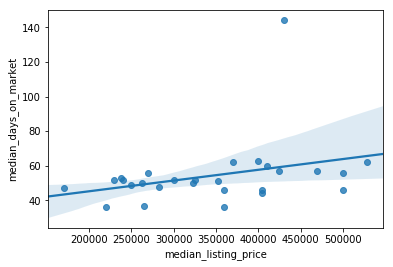

In [54]:
sns.regplot(x="median_listing_price", y="median_days_on_market", data=rva_df)

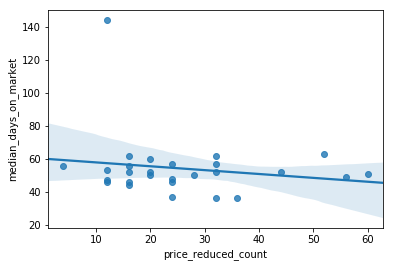

In [55]:
sns.regplot(x="price_reduced_count", y="median_days_on_market", data=rva_df)

In [ ]:
sns.regplot(x="price_reduced_count", y="active_listing_count", data=rva_df)

In [45]:
rva_merged = pd.merge(rva_df, rva_grouped, how='left',
        on='ZipCode', validate="1:1")
rva_merged.head()
##write results to csv to import into excel or other uses for later
##project.save_data(file_name = "merged_data.csv",data = rva_merged.to_csv(index=False))


,ZipCode,zip_name,median_listing_price,average_listing_price,new_listing_count,active_listing_count,total_listing_count,price_reduced_count,median_days_on_market,Wine Shop,...,Market,Museum,Performing Arts Venue,Pet Store,Pharmacy,Salon / Barbershop,Social Club,State / Provincial Park,Supermarket,Theater
0,23060,"glen allen, va",359550.0,365899.0,48.0,92.0,165.0,36.0,36.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,2.0,0.0
1,23223,"richmond, va",249950.0,263672.0,44.0,123.0,212.0,56.0,49.0,0.0,...,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,23005,"ashland, va",430800.0,467555.0,8.0,76.0,117.0,12.0,144.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
3,23221,"richmond, va",500000.0,648158.0,8.0,27.0,57.0,4.0,56.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,23225,"richmond, va",265050.0,265649.0,32.0,51.0,106.0,24.0,37.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [46]:
rva_merged.corr()

,median_listing_price,average_listing_price,new_listing_count,active_listing_count,total_listing_count,price_reduced_count,median_days_on_market,Wine Shop,Art Museum,Coffee Shop,...,Market,Museum,Performing Arts Venue,Pet Store,Pharmacy,Salon / Barbershop,Social Club,State / Provincial Park,Supermarket,Theater
median_listing_price,1.000000,0.916810,-0.180926,0.199102,0.127855,-0.202719,0.310002,0.008314,0.185390,0.244932,...,0.066278,0.023202,-0.174388,1.202890e-01,-0.365472,0.394942,-0.148940,0.060553,-0.027547,-0.149031
average_listing_price,0.916810,1.000000,-0.295655,0.002157,-0.054119,-0.289470,0.204240,0.202343,0.232656,0.240099,...,0.303961,0.099647,-0.108018,5.391843e-02,-0.232616,0.407639,-0.111341,-0.054676,-0.089227,-0.062393
new_listing_count,-0.180926,-0.295655,1.000000,0.736474,0.733678,0.735473,-0.376464,-0.210237,-0.223916,0.039832,...,-0.431961,-0.122981,0.070859,9.025231e-02,-0.241601,-0.242258,-0.103594,-0.164809,0.061045,-0.113375
active_listing_count,0.199102,0.002157,0.736474,1.000000,0.973339,0.721232,0.091038,-0.393098,-0.328177,-0.020625,...,-0.349829,-0.107629,0.040058,1.796878e-01,-0.363171,-0.012436,-0.218259,0.178927,0.082746,-0.193524
total_listing_count,0.127855,-0.054119,0.733678,0.973339,1.000000,0.703874,0.032414,-0.412924,-0.354416,-0.092097,...,-0.343274,-0.179332,-0.032220,1.869208e-01,-0.272827,-0.011070,-0.163131,0.259990,0.174722,-0.197921
price_reduced_count,-0.202719,-0.289470,0.735473,0.721232,0.703874,1.000000,-0.171007,-0.134964,-0.281853,-0.055795,...,-0.141340,0.130013,0.331669,2.214203e-01,-0.346952,-0.292490,-0.137208,0.089294,-0.169407,-0.009177
median_days_on_market,0.310002,0.204240,-0.376464,0.091038,0.032414,-0.171007,1.000000,-0.082728,-0.157500,-0.214282,...,-0.002906,-0.085075,-0.107788,9.286626e-02,0.036853,0.161032,0.019456,0.081396,-0.008879,-0.064290
Wine Shop,0.008314,0.202343,-0.210237,-0.393098,-0.412924,-0.134964,-0.082728,1.000000,-0.129233,0.221708,...,0.361905,-0.197659,-0.129233,2.385534e-01,0.198786,0.143451,0.097590,-0.156144,-0.177123,0.023497
Art Museum,0.185390,0.232656,-0.223916,-0.328177,-0.354416,-0.281853,-0.157500,-0.129233,1.000000,0.395697,...,0.129233,0.513327,0.246377,-2.809003e-01,-0.291489,-0.064349,-0.072232,-0.072232,-0.436994,0.246377
Coffee Shop,0.244932,0.240099,0.039832,-0.020625,-0.092097,-0.055795,-0.214282,0.221708,0.395697,1.000000,...,0.084909,0.154582,0.093105,1.423251e-01,-0.299095,0.148563,0.009667,-0.116008,-0.559278,0.244401


In [ ]:
sns.regplot(x="average_listing_price", y="Coffee Shop", data=rva_merged)

In [58]:
rva_merg2 = pd.merge(rva_df, coords_df, how='left',
        on='ZipCode', validate="1:1")
rva_merg_x = rva_merg2[{'median_listing_price','active_listing_count','median_days_on_market','Distance' }]
rva_merg_x.corr()

,median_days_on_market,active_listing_count,Distance,median_listing_price
median_days_on_market,1.000000,0.091038,0.240308,0.310002
active_listing_count,0.091038,1.000000,0.337774,0.199102
Distance,0.240308,0.337774,1.000000,-0.130345
median_listing_price,0.310002,0.199102,-0.130345,1.000000


In [76]:
rva_z = rva_merg2[['ZipCode','zip_name','display_name','Distance','median_listing_price','active_listing_count','median_days_on_market']]
rva_z.sort_values('median_listing_price')

,ZipCode,zip_name,display_name,Distance,median_listing_price,active_listing_count,median_days_on_market
9,23224,"richmond, va",Richmond City,8.306879,170050.0,53.0,47.0
25,23228,"henrico, va",Lakeside,2.236781,220050.0,59.0,36.0
16,23222,"richmond, va",Richmond City,5.990948,230045.0,89.0,52.0
23,23237,"richmond, va",Chesterfield County,14.539558,237500.0,51.0,53.0
15,23234,"richmond, va",Chesterfield County,11.270492,240000.0,61.0,52.0
1,23223,"richmond, va",East Highland Park,8.519557,249950.0,123.0,49.0
11,23231,"henrico, va",Henrico County,12.382579,262780.0,95.0,50.0
4,23225,"richmond, va",Richmond City,6.132441,265050.0,51.0,37.0
21,23227,"richmond, va",Henrico County,4.489205,270040.0,38.0,56.0
26,23235,"richmond, va",Bon Air,6.843039,283357.0,82.0,48.0
